In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
%%html
<style> 
th{
    font-size: 20px;
    font-weight: bold;
}

td{
    font-size: 18px;
}
</style>

# La transformée de Laplace

## Objectif global de ce document

L’objectif de ce document est de permettre la maîtrise de la transformée de Laplace, et de donner une signification aux fonctions 

$$e^{-st}$$

que l’on retrouve dans la transformée. On verra également comment établir la stabilité d’un système en analysant sa fonction de transfert $H(s)$, et quel est le lien entre la transformée de Laplace et la transformée de Fourier. La transformée de Laplace apparaîtra comme une forme plus générale de la transformée de Fourier, et la transformée de Fourier comme un cas particulier de la transformée de Laplace. À la fin de ce document, vous serez en mesure de tracer une bonne approximation de la fonction de transfert harmonique $H(j\omega)$ d’un système simplement en faisant une analyse assez sommaire de sa fonction de transfert $H(s)$ (analyse des pôles et des zéros), sans même avoir à poser $s = j\omega$ et à calculer le module de $H(j\omega)$ pour différentes valeurs de $\omega$.

En route.

## Introduction

Après avoir étudié et utilisé les outils de l’analyse spectrale comme les séries de Fourier et la transformée de Fourier, on devrait être convaincu que ces représentations donnent de l’information très utile sur les signaux et les systèmes analysés. Le spectre d’un signal indique, par exemple, à quelles fréquences est concentrée l’énergie du signal. De même, la fonction de transfert harmonique d’un filtre nous indique le gain et le déphasage que subira une sinusoïde de fréquence donnée si on l’applique à l’entrée du filtre. 

De façon formelle, la relation entre ces deux informations (transformée d’un signal et fonction de transfert d’un système ou d’un filtre) s’exprime comme suit :

> Transformée de la sortie = Fonction de transfert x transformée de l’entrée
    
En identifiant par des lettres majuscules les transformées des signaux (convention habituelle), on peut écrire ceci comme suit :

$$
Y = H \quad X
$$

où $H$ est la fonction de transfert du système, $X$ est la transformée de du signal d’entrée et $Y$ est la transformée du signal de sortie.

En prenant ensuite la transformée inverse de $Y$, on retrouve ce signal
dans le domaine temporel (i.e. le signal de sortie $y(t)$).

Si on a la transformée de Fourier de l’entrée, notée $X(j\omega)$, alors on doit utiliser la fonction de transfert harmonique $X(j\omega)$ du système. Il existe cependant certains signaux simples pour lesquels la transformée de Fourier n’existe pas. Que faire alors ?

La réponse est simple : on va utiliser une transformée plus «générale» que la transformée de Fourier, qui s’applique à tous les signaux. Cette
transformée plus général, c’est la **transformée de Laplace**. L’interprétation physique est simple : il s’agit simplement de considérer des fonctions plus générales que les sinusoïdes à amplitude constante (comme c’est le cas avec Fourier) pour tenter de “fabriquer”, en les additionnant, un signal donné $x(t)$ à analyser.

## Un exemple simple

Prenons un exemple simple. On désire connaître la réponse d’un circuit RC passif passe-bas d’ordre 1 à la rampe

$$
x(t)= \begin{cases}t & \text { pour } t>0 \\ 0 & \text { pour } t<0\end{cases}
$$

ce qui s’écrit aussi $x(t) = t\ u(t)$ où $u(t)$ est la fonction échelon qui vaut 0 pour $t < 0$ et 1 pour $t > 0$. La fonction de transfert harmonique d’un réseau RC passe-bas d’ordre 1 est donnée par (vu dans l’unité 2) :

$$
H(j\omega) = \frac{1}{j\omega RC + 1}
$$

Si on peut calculer la transformée de Fourier $X(j\omega)$ du signal $x(t)$, on pourra alors multiplier $X(j\omega)$ par $H(j\omega)$ pour obtenir la transformée de la sortie :

$$
Y(j\omega) = X(j\omega)\ H(j\omega)
$$

et finalement obtenir la sortie $y(t)$ dans le domaine temporel en prenant la transformée inverse de $Y(j\omega)$.

Mais quelle est la transformée de Fourier de $x(t) = t\ u(t)$ ? En appliquant la définition de la transformée de Fourier, on a :

$$
\begin{aligned}
X(j \omega) & =\int_{t=-\infty}^{\infty} x(t) e^{-j \omega x} d t \\
& =\int_{t=0}^{\infty} t e^{-j \omega x} d t
\end{aligned}
$$

On trouve facilement que cette intégrale donne :

$$
X(j \omega)=\left[\left(\frac{1}{\omega^2}-\frac{t}{j \omega}\right) e^{-j \omega t}\right]_{t=0}^{t=\infty}
$$

Or, cette intégrale ne converge pas (i.e. lorsque l’on remplace $t$ par $\infty$, le terme $t\mathrm{e}^{-j\omega t}$ devient infini). L’interprétation physique de cet état de fait est simple : la rampe $x(t) = t$ ne peut tout simplement pas être remplacée par une somme infinie de fonctions exponentielles d’amplitudes constantes. Il faut donc considérer des fonctions plus générales. Pour ce faire, on va considérer des fonctions de la forme plus générale est, où $s$ est un nombre complexe.

Ainsi, pour faire l’analyse ( obtenir la transformée) du signal $x(t)$, on va appliquer l’intégrale suivante, que l’on appelle la transformée de Laplace :

<div class="alert alert-block alert-info">
Transformée de Laplace

$$
X(s)=\int_{t=-\infty}^{\infty} x(t) e^{-s t} d t
$$

</div>

où $s$ est une variable complexe. On écrit typiquement $s$ comme suit

$$
s = \sigma + j\ \omega
$$

où $\sigma$ est la partie réelle de la variable $s$ et $j\omega$ est sa partie imaginaire. On voit déjà apparaître la notion que la variable $s$ est une forme de fréquence plus générale que la variable $\omega$. En effet la multiplication de $s$ par $t$ doit donner un nombre sans unité, puisque l’exposant dans $e^{st}$ est doit être sans unité, ce qui signifie que $s$ a les unités de sec<sup>-1</sup>, i.e. une fréquence.  De plus, on observe que si l’on pose $\sigma = 0$, on a :

$$
s = j\ \omega
$$

On retombe alors au cas particulier de la transformée de Fourier, puisqu’en effet, en remplaçant $s$ par $j\omega$ dans la définition de la transformée de Laplace donnée ci-dessus, on obtient :

$$
X(j\omega)=\int_{t=-\infty}^{\infty} x(t) e^{-j\omega t} d t
$$

ce qui n’est rien d’autre que la transformée de Fourier de $x(t)$.

Revenons à notre exemple. On désire connaître la réponse $y(t)$ du filtre RC passe-bas si l’entrée est :

$$
x(t)= \begin{cases}t & \text { pour } t>0 \\ 0 & \text { pour } t<0\end{cases}
$$

La transformée de Laplace de ce $x(t)$ est donnée par :

$$
X(s) = \frac{1}{s^2}
$$

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; background-color: #dff0d8; border-color: #d6e9c6;">
Un document contenant des paires de transformes de Laplace communes vous est fourni comme référence. Voir le site web de l'unité.
</div>

On aurait pu calculer l’intégrale de la transformée de Laplace, mais utiliser les tables, lorsque c’est possible, est tellement plus simple…

Cette transformée $X(s)$ existe (c.a.d. que l’intégrale converge) uniquement si $\sigma > 0$, i.e. si la partie réelle de la variable $s$ est positive. On dira que le domaine de convergence de $X(s)$ est la partie droite du plan complexe (en excluant l’axe imaginaire $j\omega$).

Que fait-on avec cette information ? En multipliant $X(s)$ par la fonction de transfert $H(s)$ du filtre, on trouvera la transformée de Laplace $Y(s)$ de la sortie. On n’aura plus qu’à en évaluer la transformée de Laplace inverse pour obtenir la sortie $y(t)$.

Quelle est la fonction de transfert $H(s)$ du filtre RC passe-bas d’ordre 1? On sait que sa fonction de transfert harmonique est donnée par :

$$
H(j\omega) = \frac{1}{j\omega RC + 1}
$$

On a vu aussi que $H(j\omega)$ est un cas particulier de la transformée de Laplace, i.e. qu’on obtient $H(j\omega)$ en remplaçant $s$ par $j\omega$ dans $H(s)$. On
devine donc facilement que la fonction de transfert $H(s)$ du filtre passe-bas RC d’ordre 1 sera donnée par :

$$
H(s) = \frac{1}{ RCs + 1}
$$

Ceci revient aussi à dire que les impédances complexes pour le condensateur et l’inductances sont vues comme suit :

|Composant|Impédance complexe - Domaine de fourier| Impédance complexe - Domaine de Laplace|
|-----------------|-----------------------|---------------------|
Condensateur **C** | $1/(j\omega C)$ | $1/(sC)$|
Inductance **L** | $j\omega L$ | $sL$|

On peut maintenant donner la réponse de tout système linéaire dans le domaine de Laplace :

$$
Y(s) = H(s)\ X(s)
$$

où $H(s)$ est la fonction de transfert du système, et $X(s)$ est la transformée de Laplace de l’entrée. Pour l’exemple simple que nous traitons ici (i.e. réponse d’un circuit RC passe-bas d’ordre 1 dont l’entrée est $x(t) = t\ u(t))$ cela donne :

$$
Y(s) = \frac{1}{s^2} \frac{1}{RCs + 1}
$$

(notez que l’on suppose ici que les conditions initiales du circuit sont nulles).

Pour simplifier, on va considérer le cas particulier où $RC = 1$. On a donc :

$$
Y(s) = \frac{1}{s^2} \frac{1}{s + 1}
$$

Si cette expression se trouvait dans les tables de transformées de Laplace (voir site web de l'unité), on pourrait donner immédiatement $y(t)$ en prenant la transformée inverse de Laplace de $Y(s)$. Mais on ne trouve par cette expression directement. Par contre, on trouve dans les tables des termes en $1/s$, $1/s^2$ , et en $1/(s-\lambda)$. Peut-on écrire l’équation ci-dessus en fonction de ces termes ? Bien sûr que oui. On peut écrire 

$$
Y(s)=\frac{1}{s^2} \frac{1}{s+1}=\frac{A}{s}+\frac{B}{s^2}+\frac{C}{s+1}
$$

On appelle ce développement une décomposition en fractions partielles. Dans notre cas (cas de racines multiples – « repeated poles »), on doit déterminer les coefficients A, B et C. 

D’abord, on multiplie de part et d’autre par $s^2 (s+1)$, ce qui donne :

$$
1 = As(s+1) + B(s+1) + Cs^2
$$

En remplaçant $s$ par –1, on trouve $C=1$.

En remplaçant $s$ par 0, on trouve $B=1$.

Finalement, en remplaçant $s$ par 1, on trouve $A=-1$ (ayant déjà trouvé les valeurs de $B$ et $C$).

On a donc décomposé $Y(s)$ comme suit :
$$
Y(s)=\frac{1}{s^2} \frac{1}{s+1}=\frac{-1}{s}+\frac{1}{s^2}+\frac{1}{s+1}
$$

Maintenant, en utilisant la table des transformée de Laplace, on peut déterminer $y(t)$ en prenant la transformée de Laplace inverse des trois termes de droite dans l’expression de $Y(s)$. On trouve ainsi :

$$
y(t) = (-1+t+\mathrm{e}^{-t})u(t)
$$

Voilà. On a trouvé la réponse $y(t)$ du filtre RC passe-bas d’ordre 1 (où $RC=1$) si l’entrée est la rampe $x(t) = t$. Pour bien voir ce qui se passe, la figure ci-dessous montre l’entrée $x(t)$ (la droite $t\ u(t))$ et la sortie $y(t)$ (la droite en pointillé, recourbée au début, qui suit ensuite $x(t)$ par en-dessous).

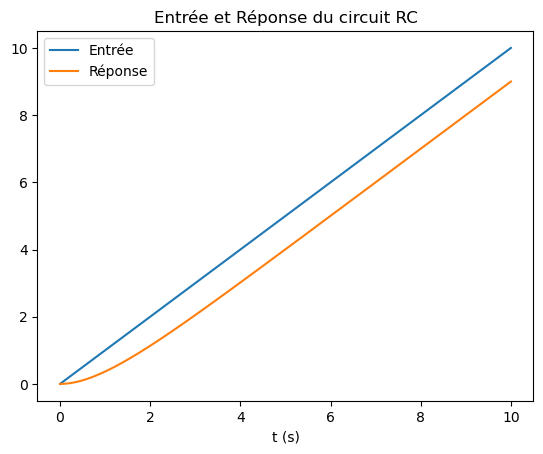

In [3]:
t = np.linspace(0,10,1000)
x = t
y = -1 + t + np.exp(-t)

plt.figure()
plt.plot(t,x)
plt.plot(t,y)
plt.title("Entrée et Réponse du circuit RC")
plt.xlabel("t (s)")
plt.legend(["Entrée", "Réponse"])

Il n’aurait pas été possible de calculer de cette façon la sortie sans la transformée de Laplace, puisque le passage par la transformée de Fourier n’était pas possible.

Notez que la transformée de Laplace a bien d’autres informations à nous communiquer, en particulier sur les systèmes (carte des pôles et zéros, stabilité et même le comportement de filtres comme les filtres de Butterworth et de Chebyshev).

## La transformée de Laplace : formalisation et 2e exemple

La transformée de Laplace $X(s)$ unilatérale d’un signal $x(t)$ se définit comme suit :

$$
X(s)=\int_{t=0}^{\infty} x(t) e^{-s t} d t
$$

On dit de cette forme qu’elle est la forme unilatérale de la transformée de Laplace puisque l’intégrale ne prend en compte que les valeurs positives du temps. Physiquement, ceci revient à ne considérer que les signaux $x(t)$ qui sont nuls pour $t<0$.

On utilise notamment la transformée de Laplace pour résoudre des équations différentielles linéaires à coefficients constants, comme par exemple :

$$
2 \frac{d y(t)}{d t}-3 y(t)=2 x(t)
$$

Puisque chaque dérivée successive par rapport à $t$ introduit un facteur « $s$ » dans le domaine de Laplace (voir les table de transformée de Laplace), on peut écrire :

$$
2sY(s)-3Y(s) = 2X(s)
$$

(en supposant que les valeurs initiales de $x(t)$ et $y(t)$ sont nulles). En isolant $Y(s)$, on trouve :

$$
Y(s) = \frac{2X(s)}{2s-3}
$$

ce qui permet d’exprimer $y$ explicitement en fonction de $x$. Si maintenant la fonction $x(t)$ est, par exemple, la fonction échelon $u(t)$ (qui vaut 0 aux temps négatifs, et 1 aux temps positifs), on a $X(s) = 1/s$, de sorte que :

$$
Y(s) = \frac{2}{s(2s-3)}
$$

On peut développer le terme de droite en fractions partielles, ce qui donne :

$$
Y(s) = \frac{-2/3}{s} + \frac{4/3}{(2s-3)}
$$

Une table de transformées nous indique que le premier terme est la transformée de Laplace de $–2/3 \  u(t)$, et que le deuxième terme est la transformée de Laplace de $2/3 \ \mathrm{e}^{(3/2)t} \ u(t)$. En prenant la transformée de Laplace inverse, on a donc la solution :

$$
y(t)=\frac{2}{3}\left(-u(t)+e^{(3 / 2) t} u(t)\right)=\frac{2}{3}\left(e^{(3 / 2) t}-1\right) u(t)
$$

(où la fonction $u(t)$ fait en sorte que $y(t)$ vaut 0 pour $t<0$).

On montre facilement que cette expression pour $y(t)$ est la solution de l’équation différentielle plus haut lorsque $x(t) = u(t)$ (simplement remplacer $y(t)$ par cette expression et $x(t)$ par $u(t)$).

On peut également résoudre un système d’équations différentielles linéaires à coefficients constants avec la transformée de Laplace. On obtient un système d’équations algébriques linéaires dans le domaine transformé, qui se résout en inversant une matrice puis en prenant la transformée inverse.

La fonction de transfert $H(s)$ d’un système linéaire (par exemple un filtre analogique) s’obtient en isolant le rapport $Y(s)/X(s)$ – la transformée de la sortie divisée par la transformée de l’entrée – après avoir transformé l’équation différentielle du système. En posant $s = j\omega$ dans $H(s)$, on obtient directement la fonction de transfert harmonique du système, $H(j\omega)$  (vue à l’unité 2 de S2), à partir de laquelle on peut tracer le gain et le déphasage du système à chaque fréquence (lieu de Bode).

## Convergence

La Transformée de Laplace d’un signal $x(t)$ est une fonction de la variable complexe $s$. Comme $s$ est définie sur tout le plan complexe, on pourrait supposer que la transformée $X(s)$ le sera aussi. Ce n’est pas toujours le cas. En effet, selon la forme du signal $x(t)$, l’intégrale 

$$
X(s)=\int_{t=0}^{\infty} x(t) e^{-s t} d t
$$

ne converge pas pour toutes les valeurs de $s$. Ainsi, la fonction $X(s)$ n’est pas définie partout dans le plan complexe. La région du plan complexe où l’intégrale de $X(s)$ converge s’appelle justement le domaine de convergence.

Prenons un exemple. Soit le signal $x(t)$ suivant :

$$
x(t) = \mathrm{e}^{-at}u(t)
$$

où $a$ est une constante réelle. La transformée de Laplace de $x(t)$ est donnée par:

$$
\begin{aligned}
X(s) & =\int_{t=0}^{\infty} e^{-a t} e^{-s t} d t \\
& =\int_{t=0}^{\infty} e^{-(s+a) t} d t \\
& \left.=\frac{e^{-(s+a) t}}{-(s+a)}\right]_{t=0}^{t=\infty}
\end{aligned}
$$

Cette intégrale convergera uniquement si :

$$
\mathrm{Re}(s + a)  >  0
$$

(sinon, lorsqu’on prend $t=\infty$ dans l’exponentielle, le résultat ne sera pas un nombre fini).

Puisque $s$ est un nombre complexe, on a $s = \sigma + j\omega$, où $\sigma$  est sa partie réelle, et $\omega$ est sa partie imaginaire. Pour que l’intégrale converge, on a donc la condition

$$
\sigma + a > 0
$$

i.e.

$$
\sigma > -a
$$

Si a est positif, $x(t)$ est l’exponentielle décroissante de la figure suivante (on montre ici le cas où $a = 10)$ :

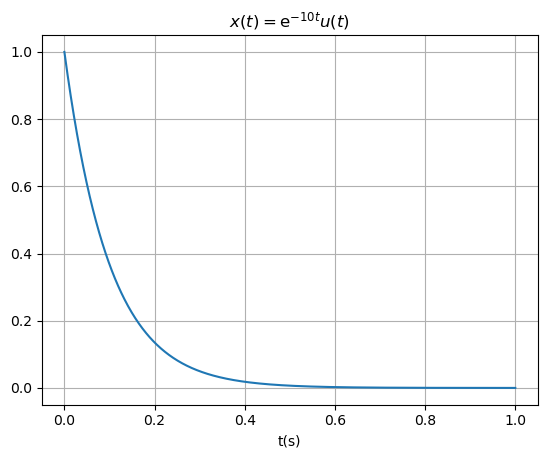

In [4]:
t = np.linspace(0,1,1000)
a = 10
x = np.exp(-a*t)

plt.figure()
plt.plot(t,x)
plt.title("$x(t) = \mathrm{e}^{-10t} u(t)$")
plt.xlabel("t(s)")
plt.grid()

Ainsi, pour ce signal $x(t)$, la région de convergence de la transformée de Laplace est la zone ombragée de la figure suivante, qui montre le plan complexe des fréquences des exponentielles complexes est = $\mathrm{e}^{(\sigma+j\omega)t}$: 

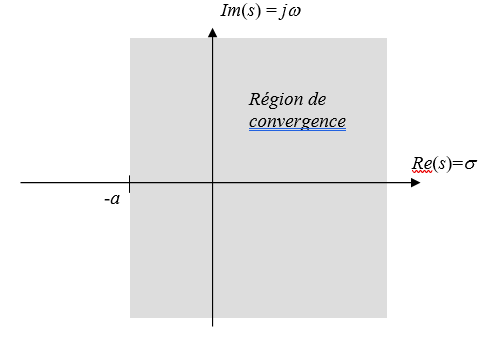

Cela signifie qu’à l’extérieur de la région de convergence (ici, lorsque la partie réelle de $s$ est inférieure à $–a$), la transformée de Laplace n’existe pas.

En général, on peut montrer qui si un signal $x(t)$ a une enveloppe temporelle qui décroît comme la fonction e-at, alors sa région de convergence sera aussi limitée à la zone grise de la figure ci-haut.

C’est le cas par exemple de la fonction $x(t) = cos(\omega t) \mathrm{e}^{-at} u(t)$, montrée ci-dessous pour $\omega = 2\pi 10$ et $a = 5$ :

Text(0.5, 0, 't(s)')

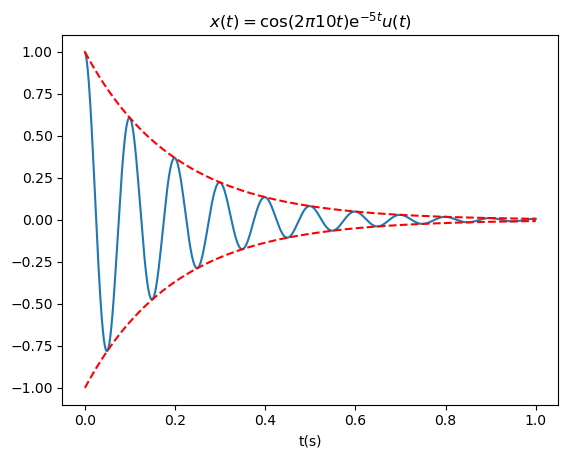

In [5]:
x = np.cos(2*np.pi*10*t)*np.exp(-5*t)
env_bot = -np.exp(-5*t)
env_top = np.exp(-5*t)

plt.figure()
plt.plot(t,x)
plt.plot(t,env_bot, color='r', ls='--')
plt.plot(t,env_top, color='r', ls='--')
plt.title("$x(t) = \cos (2\pi 10t) \mathrm{e}^{-5t} u(t)$")
plt.xlabel("t(s)")

(On montre en pointillé l’enveloppe $\mathrm{e}^{-at}$ du signal $x(t)$).

La région de convergence est importante pour évaluer la transformée de Laplace inverse. Comme nous utilisons en général des tables pour faire la transformée inverse, nous n’allons pas utiliser la notion de convergence à cet effet. Plutôt, la notion de région de convergence sera importante pour déterminer si la transformée de Fourier existe. En effet, on va montrer plus loin que la transformée de Fourier revient à évaluer la transformée de Laplace pour $s = j\omega$, i.e. le long de l’axe imaginaire (le point $s = j\omega$ est un point purement imaginaire, sur l’axe imaginaire dans le plan complexe). Si la région de convergence n’inclut pas cet axe imaginaire, alors la transformée de Fourier du signal en question n’existe pas. 

## Pôles et zéros

On a déjà vu que la fonction de transfert d’un circuit RC passe-bas s’écrit :

$$
H(s) = \frac{1/RC}{s+1/RC}
$$

où le produit RC est la constante de temps du circuit. La réponse de ce circuit, dans le domaine de Laplace, est :

$$
Y(s) = H(s)\ X(s)
$$

où $X(s)$ est la transformée de Laplace de l’entrée.
La fonction de transfert $H(s)$ peut être décrite par ses pôles et ses zéros. Les pôles sont les racines du dénominateur de $H(s)$, i.e. les valeurs de $s$ pour lesquelles $H(s)$ vaut l’infini, et les zéros sont les racines du numérateur, i.e. les valeurs de s telles pour lesquelles $H(s)$ vaut 0. Les racines d’un polynôme sont les valeurs de sa variable indépendante (ici, la variable $s$) où le polynôme s’annule.

Une caractéristique importante des pôles et des zéros d’une fonction de transfert $H(s)$ est que, pour que la réponse impulsionnelle $h(t)$  — qui est la transformée de Laplace inverse de $H(s)$, pourquoi ? —  d’un système soit réelle, les pôles et les zéros doivent apparaître en paires conjuguées. Seuls les pôles ou les zéros réels n’ont pas à obéir à cette contrainte. Par exemple, une fonction de transfert d’ordre 3 aura nécessairement soit trois pôles réels, soit un pôle réel et une paire de pôles complexes conjugués. 

La fonction de transfert d’ordre 1 suivante :

$$
H(s) = \frac{1/RC}{s+1/RC}
$$

a un pôle (réel) à $s = -1/RC$, et apparemment aucun zéro. En fait, **toute fonction rationnelle (sous forme de fraction) a autant de pôles que de zéros**; il faut donc que $H(s)$ ait un zéro. Il faut se tourner vers le dénominateur puisque le numérateur est une constante (pas un « polynôme en s »). Effectivement, si on pose $s=\infty$ au dénominateur, $H(s)$ s’annule. On a donc un zéro à $s=\infty$. C’est normal puisque c’est un filtre passe-bas, et que son gain doit tendre vers zéro lorsque la fréquence augmente ($s=j\omega$).


La figure suivante montre le diagramme pôles-zéros de ce filtre (on ne montre pas les pôles ou les zéros à l’infini dans de tels diagrammes mais ont peut l'indiquer dans la légende ou le texte associé) :

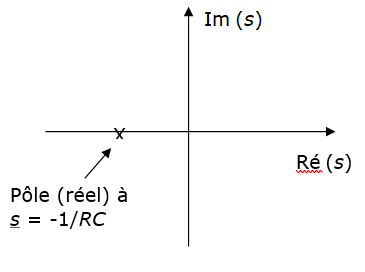

En général, dans de tels diagrammes, un « x » représente un pôle et un « o » représente un zéro.

La fonction de transfert $H(s)$ est ainsi entièrement définie soit par son expression explicite

$$
H(s) = \frac{1/RC}{s+1/RC}
$$

soit par le diagramme pôles-zéros ci-dessus, en ajoutant l’information de gain $K = 1/RC$ du dénominateur de $H(s)$ (qui n’apparaît pas dans le diagramme pôles-zéros).

Le diagramme (ou carte) des pôles et des zéros d’une fonction de transfert est une représentation très riche en informations, qui nous permettra, entre autres, de dire si le système (le filtre) est stable ou non, et à partir de laquelle il sera facile de donner une approximation de la forme de la réponse en fréquence $H(\omega)$.

## Exercices sur les pôles et zéros

### Exercice 1

Tracez le diagramme pôles-zéros des fonctions de transfert suivantes, en indiquant le gain $K$ du système.

1 - $ H(s) = \frac{s(s+1)}{s^2+2s+3}$

2 - $ H(s) = \frac{5s^2 - 2s + 1}{s^2 + 10s + 50}$

3 - La fonction de transfert $H(s) du filtre suivant : 

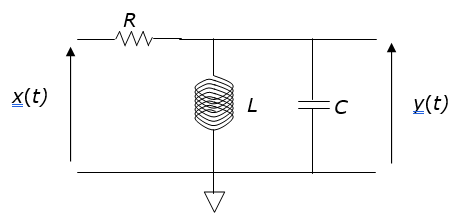

où : $R=100 \mathrm{k}\Omega$, $L=10 \mathrm{mH}$ et $C=1 \mu \mathrm{F}$


## Factorisation

Lorsque l’on a déterminé les pôles et les zéros de la fonction de transfert, on peut réécrire celle-ci en exprimant le numérateur et le dénominateur comme un produit de facteurs d’ordre 1. Par exemple, dans l’exercice 1 précédent, les pôles et les zéros de la fonction de transfert

$$
H(s) = \frac{5s^2-2s+1}{s^2 + 10s +50}
$$

sont

>Pôles : $$\begin{aligned}p1 &= -5+5j\\ p2 &=-5-5j\end{aligned}$$
    
>Zéros :  $$\begin{aligned}z1 &= 0.2+0.4j\\ p2 &=0.2-0.4j\end{aligned}$$

et le gain $K$ est $K=5$ (Facteur de $s^2$ au numérateur.

On peut donc écrire H(s) comme suit :

$$
\begin{aligned}
H(s) & =\frac{K(s-z 1)(s-z 2)}{(s-p 1)(s-p 2)} \\
& =\frac{5(s-0.2-0.4 j)(s-0.2+0.4 j)}{(s+5-5 j)(s+5+5 j)}
\end{aligned}
$$

En multipliant les facteurs du numérateur et du dénominateur, on doit obtenir à nouveau les polynômes d’ordre 2 du numérateur et du dénominateur de la fonction H(s). (Essayez pour vous en assurer).

En général, donc, une fonction de transfert de la forme :

$$
H(s)=\frac{s^N+s^{N-1}+\ldots+s+1}{s^M+s^{M-1}+\ldots+s+1}
$$

où $N$ et $M$ sont respectivement l’ordre du numérateur et du dénominateur de $H(s)$, doit pouvoir s’écrire sous la forme factorisée :

$$
H(s)=\frac{(s-z 1)(s-z 2) \ldots(s-z N)}{(s-p 1)(s-p 2) \ldots(s-p M)}
$$

où $zk$ est le $k$ième zéro de $H(s)$ et $pk$ est le $k$ième pôle de $H(s)$. On retrouve parfois la notation :

$$
H(s)=\frac{\prod_{\mathrm{k}=1}^N(s-z k)}{\prod_{k=1}^M(s-p k)}
$$

où le symbole $\Pi$ représente le produit des termes qui suivent.

Cette forme factorisée sera très pratique pour interpréter le lieu des pôles et des zéros

En exercice, écrivez les fonctions de transfert $H(s)$ de l’exercice 1 précédent sous leur forme factorisée.

## Pôles et zéros avec Python

Encore une fois, les librairies de fonctions Numpy de Python permettent de nous faciliter le travail. La fonction `roots` (__[np.roots](https://www.geeksforgeeks.org/numpy-roots-function-python/)__) permet de calculer les racines d’un polynôme. Par exemple, supposons que l’on désire obtenir les pôles et les zéros de la fonction de transfert :

$$
H(s) = \frac{5s^2-2s+1}{s^2 + 10s +50}
$$

**Les zéros sont les racines du numérateur et les pôles, les racines du dénominateur.** La fonction roots prend comme argument les coefficients de la variable $s$, dans l’ordre descendant des puissances. Pour obtenir les racines du numérateur (les zéros) et les racines du dénominateur (les pôles) on a donc le code Python suivant :

```
import numpy as np
num = [5, -2, 1]
den = [1, 10, 50]

zeros = np.roots(num)
poles = np.roots(den)
```

In [6]:
num = [5, -2, 1]
den = [1, 10, 50]

zeros = np.roots(num)
poles = np.roots(den)

print("Zero 1: {0:.2f} \nZero 2: {1:.2f}".format(zeros[0], zeros[1]))
print("Pole 1: {0:.2f} \nPole 2: {1:.2f}".format(poles[0], poles[1]))

Zero 1: 0.20+0.40j 
Zero 2: 0.20-0.40j
Pole 1: -5.00+5.00j 
Pole 2: -5.00-5.00j


On retrouve là les zéros et les pôles obtenus précedemment. 

Puisque les racines d’un polynôme ne changent pas si on multiplie (ou divise) le polynôme par une constante non nulle, il est important de toujours mettre en évidence le coefficient de la plus grande puissance de $s$ au numérateur et au dénominateur de $H(s)$. Ainsi, pour la fonction de transfert :

$$
H(s) = \frac{5s^2-2s+1}{2s^2 + 10s +50}
$$

on devrait plutôt écrire :

$$
H(s) = \frac{5(s^2-0.4s+0.2)}{2(s^2 + 5s +25)}
$$

de sorte que le gain $K$ (ici 5/2 = 2.5) soit mis en évidence, puisqu’il n’apparaîtra pas dans les valeurs des pôles et des zéros. La fonction de transfert sera donc complètement définie par son gain $K$, et par le lieu de ses pôles et de ses zéros.
Faisons maintenant un autre exemple Python, où on verra aussi comment obtenir la carte des pôles et des zéros.

## Affichage de la carte des pôles et des zéros avec Python

La figure suivante montre un exemple où on a fait la conception, avec la fonction `butter` de la librairie `scipy` (__[scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)__), d’un filtre passe-bande Butterworth d’ordre 2, dont les fréquences basse et haute (début et fin de la bande passante) sont 100 et 200 radians/seconde. Les coefficients du numérateur de la fonction de transfert sont dans le vecteur `B`, et les coefficients du dénominateur sont dans le vecteur `A`. On calcule ensuite les pôles et les zéros de la fonction de transfert correspondante, et on les affiche dans le plan. 

```
import scipy.signal as signal
import matplotlib.pyplot as plt

B, A = signal.butter(2, [100, 200], 'bandpass', analog=True)

zeros = np.roots(B)
poles = np.roots(A)

plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o')
plt.scatter(np.real(poles), np.imag(poles), marker='x')
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
```

Comme on le voit, on a d’abord calculé les coefficients de la fonction de transfert du passe-bande (`B` et `A`). On a ensuite calculé les racines de `B` (les zéros) et de `A` (les pôles). Puis, pour afficher ces racines dans le plan complexe, on utilise la fonction `scatter` pour afficher la partie imaginaire de chaque racine en fonction de sa partie réelle. Le résultat de la fonction `scatter` est montré à la figure suivante, où les pôles sont représentés par des « x » et les zéros par des « o ».


Text(0, 0.5, 'Partie imaginaire')

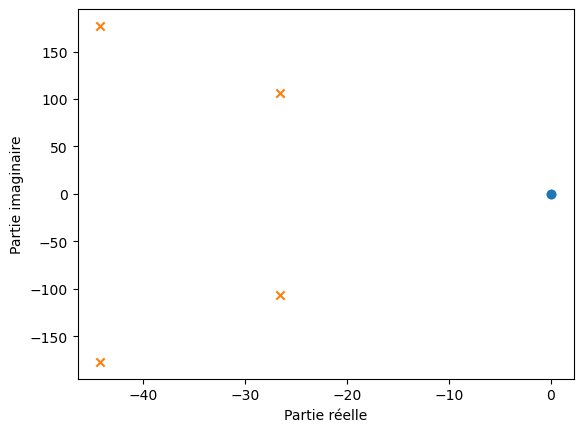

In [7]:
B, A = signal.butter(2, [100, 200], 'bandpass', analog=True)

zeros = np.roots(B)
poles = np.roots(A)

plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o')
plt.scatter(np.real(poles), np.imag(poles), marker='x')
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")

Notez qu’il y a 2 zéros à $s = 0$. Puisqu’ils sont superposés, on n’en voit qu’un seul.

Notez qu’il y a aussi 2 zéros à $s = \infty$. Puisqu’il doit y avoir autant de zéros que de pôles.

La position des pôles et des zéros a un lien direct avec la forme de la réponse en fréquence $H(\omega)$, dont on  montre ici le module.


Text(0, 0.5, 'Module de H(w)')

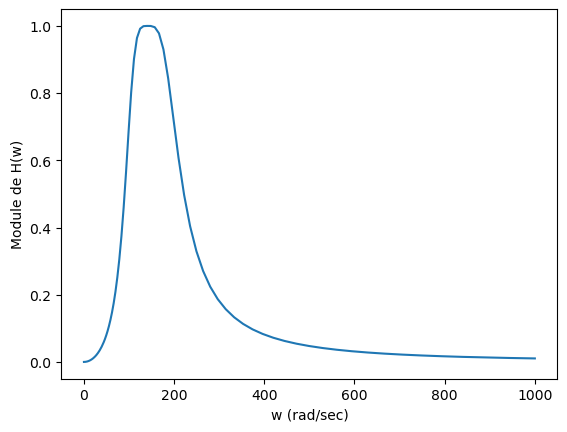

In [8]:
w, h = signal.freqs(B, A)

plt.figure()
plt.plot(w, np.abs(h))
plt.xlabel("w (rad/sec)")
plt.ylabel("Module de H(w)")

### Exercices Python avec les pôles et les zéros

Refaites avec Python les exercices de la section 7.

## Lien entre les transformées de Laplace et de Fourier

En observant les équations de transformation pour la transformée de Laplace:

$$
X(s)=\int_{t=0}^{\infty} x(t) e^{-s t} d t
$$

et pour la transformée de Fourier:

$$
X(s)=\int_{t=-\infty}^{\infty} x(t) e^{-j\omega t} d t
$$

on note que si on restreint $x(t)$ à être causal (i.e. $x(t) = 0$ pour $t < 0$), la transformée de Fourier s’obtient en posant

$$
s\ = j \ \omega
$$

dans la transformée de Laplace. Vous avez déjà posé cette « restriction » sur $s$ pour tracer le lieu de Bode d’un système. 

Mais quelle est l’interprétation de cette égalité ($s = j\omega$) dans le plan complexe? 

Pour chaque valeur de la variable complexe $s$, la fonction de transfert $H(s)$ est aussi un nombre complexe qui a donc un module et une phase (sauf à l’extérieur de la région de convergence, où $H(s)$ n’est pas définie). Le module de $H(s)$ peut être vu comme une « toile de tente » qui s’étend partout au-dessus du plan complexe, qui tendra vers l’infini près des pôles (le dénominateur de $H(s)$ s’annule) et qui tendra vers 0 près des zéros (le numérateur de $H(s)$ s’annule).

Si on pose maintenant $s= j\omega$ pour passer de $H(s)$ à $H(j\omega)$, cela signifie que l’on évalue $H(s)$ uniquement pour les valeurs de $s$ qui sont purement imaginaires, i.e., plus précisément, uniquement pour les valeurs de $s$ qui sont sur l’axe imaginaire dans le plan complexe. 

Prenons par exemple la fonction de transfert suivante :

$$
H(s) = \frac{26}{s^2+2s+26}
$$

Les pôles sont à $-1\pm5j$ tel que le montre la figure suivante (et les zéros sont à l'infini):


(-2.0, 0.0, -10.0, 10.0)

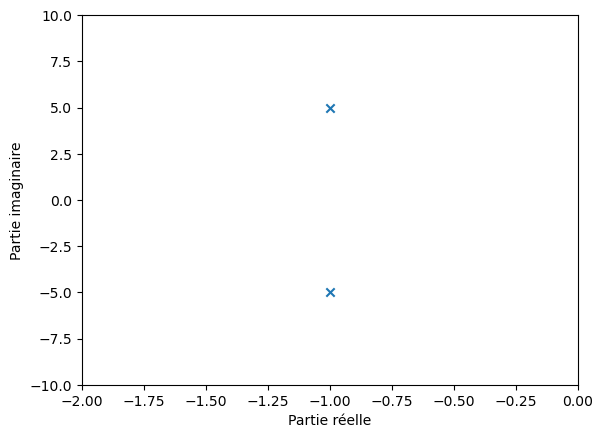

In [9]:
num = 26
den = [1, 2, 26]

poles = np.roots(den)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x')
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
plt.axis([-2,0,-10,10])

Le module de $H(s)$ va tendre vers l’infini lorsque $s$ s’approche de ces pôles. La figure suivante montre le module de $H(s)$ sur une partie du plan $s$ (partie réelle entre –4 et 0, partie imaginaire entre –10 et 10).

On montre aussi les deux pôles sur le plan complexe (représentés par des « x » sous les deux pics de la fonction). Remarquez que le module de $H(s)$ augmente lorsque l’on se rapproche des pôles. (On a saturé le module à 5 pour des raisons de représentation graphique).

<Figure size 640x480 with 0 Axes>

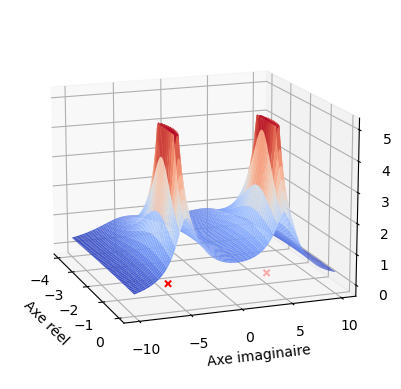

In [10]:
r = np.linspace(-4,0,1000)
i = np.linspace(-10,10,1000)

sigma, omega = np.meshgrid(r, i)
s = sigma+omega*1j
Hs = 26/(s**2+2*s+26)
Hs[np.abs(Hs)>5] = 5

from matplotlib import cm
plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(sigma, omega, np.abs(Hs), cmap=cm.coolwarm)
ax.scatter(np.real(poles), np.imag(poles), 0, marker='x', color='r')
plt.xlabel("Axe réel")
plt.ylabel("Axe imaginaire")
ax.view_init(15, -20)

Maintenant, puisque la réponse en fréquence $H(j\omega)$ est égale à la fonction de transfert $H(s)$ évaluée à $s= j\omega$, le module de $H(j\omega)$ est simplement obtenu en « sectionnant » le module de $H(s)$ (figure ci-dessus) le long de l’axe imaginaire $s= j\omega$ et en observant la coupe. Dans la figure ci-dessus, l’axe imaginaire va de $\omega = -10$ à $\omega = 10$. Il est identifié, de même que l’axe réel. 

La coupe de $H(s)$ est donc le devant de la surface que nous voyons dans la figure ci-dessus. Elle correspond bien au module de $H(j\omega)$, montré ci-dessous :


Text(0, 0.5, 'Module de H(w)')

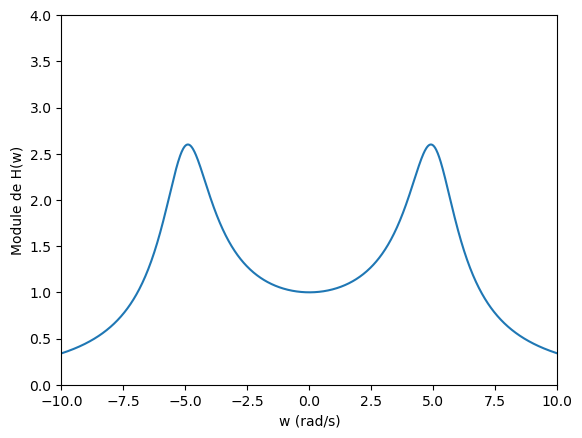

In [11]:
w = np.linspace(-10,10,1000)

s = 0+w*1j
Hs = 26/(s**2+2*s+26)

plt.figure()
plt.plot(w, np.abs(Hs))
plt.axis([-10,10,0,4])
plt.xlabel("w (rad/s)")
plt.ylabel("Module de H(w)")

On pourrait traiter la phase de la même manière.

On voit donc que la forme de $H(j\omega)$ est fortement influencée par la position des pôles (et des zéros) de la fonction de transfert $H(s)$. Plus un pôle de $H(s)$ sera proche de l’axe imaginaire (partie réelle petite), plus le module de $H(j\omega)$ vis-à-vis ce pôle sera important. Inversement, plus un zéro de $H(s)$ sera proche de l’axe imaginaire (partie réelle petite), plus le module de $H(j\omega)$ vis-à-vis ce zéro sera petit.

### Exercice : Forme de $H(j\omega)$ en fonction des pôles et des zéros

<a id="Systeme2"></a>

Les deux figures suivantes montrent la carte des pôles et des zéros de deux fonctions de transfert. Tracez approximativement le module de la réponse en fréquence correspondante. Le gain $K$ des deux systèmes est $K = 1$.

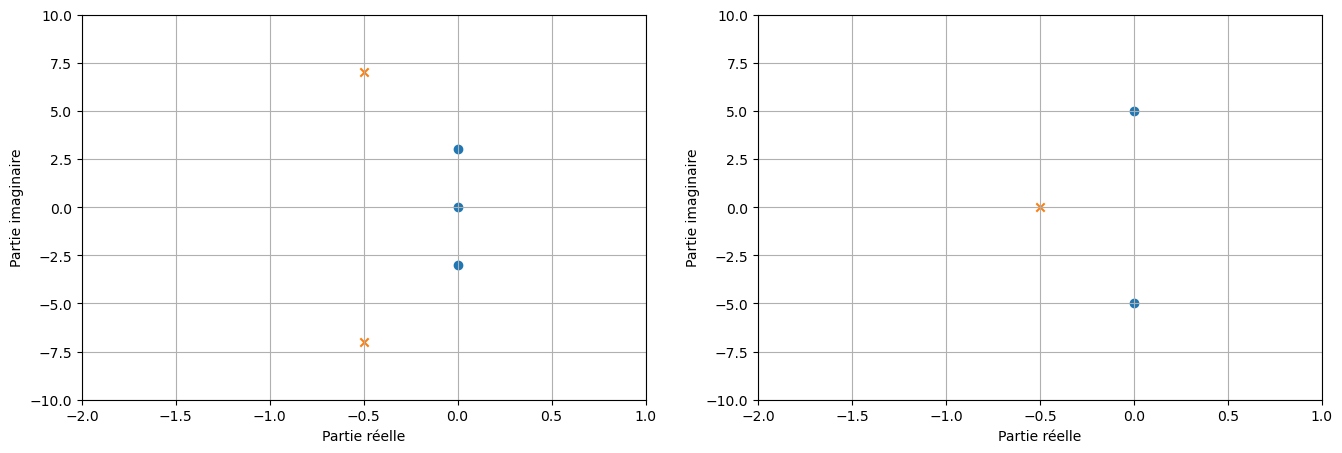

In [12]:
p1 = [-0.5+7j, -0.5-7j]
z1 = [-3j, 0j, 3j]

p2 = [-0.5]
z2 = [-5j, 5j]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(np.real(z1), np.imag(z1), marker='o')
ax1.scatter(np.real(p1), np.imag(p1), marker='x')
ax1.axis([-2, 1, -10, 10])
ax1.set_xlabel("Partie réelle")
ax1.set_ylabel("Partie imaginaire")
ax1.grid()

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(np.real(z2), np.imag(z2), marker='o')
ax2.scatter(np.real(p2), np.imag(p2), marker='x')
ax2.axis([-2, 1, -10, 10])
ax2.set_xlabel("Partie réelle")
ax2.set_ylabel("Partie imaginaire")
ax2.grid()

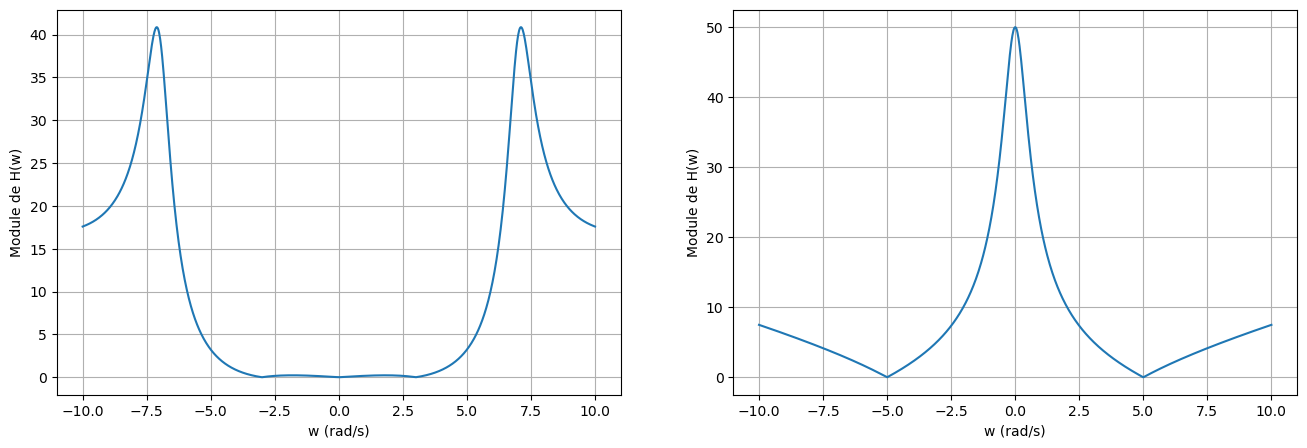

In [13]:
H1 = ((s-z1[0])*(s-z1[1])*(s-z1[2]))/((s-p1[0])*(s-p1[1]))

H2 = ((s-z2[0])*(s-z2[1]))/(s-p2[0])

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1, 2, 1)
ax1.plot(w, np.abs(H1))
ax1.set_xlabel("w (rad/s)")
ax1.set_ylabel("Module de H(w)")
ax1.grid()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(w, np.abs(H2))
ax2.set_xlabel("w (rad/s)")
ax2.set_ylabel("Module de H(w)")
ax2.grid()

Vous avez probablement réussi à dessiner approximativement le module de ces fonctions de transfert, sans toutefois arriver à déterminer correctement les échelles. Par exemple, pourquoi le gain DC (à $\omega = 0$) du système 2 est-il de 50? Par contre, vous arrivez correctement à placer les « 0 » dans le module de la réponse en fréquence $H(\omega)$: lorsqu’un zéro dans le plan complexe se trouve sur l’axe imaginaire, le module de $H(\omega)$ devra nécessairement passer par 0 à cette valeur de $\omega$. De même, lorsqu’un pôle dans le plan complexe se trouve près de l’axe imaginaire (par exemple, à $\omega = 0$ dans le système 2), alors le module de $H(\omega)$ sera plus grand vis-à-vis cette valeur de $\omega$.

Mais peut-on tracer une bonne approximation du module de $H(j\omega)$, incluant les valeurs d’échelle, en connaissant uniquement la position des pôles et des zéros du système?

Mais oui. C’est ce que nous verrons dans la prochaine section.

## Méthode géométrique

On va utiliser ici la forme factorisée de $H(s)$ :

$$
H(s) = \frac{(s-z1)(s-z2)...(s-zN)}{(s-p1)(s-p2)...(s-pM)}
$$

On met ici en évidence chaque zéro (les $zk$) et chaque pôle (les $pk$) de la fonction de transfert. Maintenant, on pose $s= j\omega$ pour obtenir la réponse en fréquence $H(\omega)$ :

$$
H(s) = \frac{(j\omega-z1)(j\omega-z2)...(j\omega-zN)}{(j\omega-p1)(j\omega-p2)...(j\omega-pM)}
$$

Chaque terme entre parenthèses est la différence entre le point $j\omega$ (un point sur l’axe imaginaire) et un pôle ou un zéro. Par exemple, le terme ($j\omega -z1$) est la différence entre le point $j\omega$ et le premier zéro, $z1$, du système. Cette différence est, dans le plan complexe, un vecteur qui va du point $z1$ au point $j\omega$. 

Puisque **le module d’un produit est le produit des modules**, et donc le module d’un ratio est le ratio des modules, il en ressort que le module de $H(j\omega)$ est égal au produit des distances entre $j\omega$ et chacun des zéros, divisé par le produit des distances entre $j\omega$ et chacun des pôles.

Faisons un exemple, ce sera plus clair.

Supposons que l’on ait un filtre analogique dont la fonction de transfert est donnée par :

$$
H(s) = \frac{s+1}{s^2+2s+5}
$$

Le gain K de ce filtre est $K = 1$. Le gain DC de ce filtre est $1/5 = 0.2$ (poser simplement  $s = j\omega = 0$). La figure suivante montre le lieu des pôles et des zéros de ce filtre :

Text(0, 0.5, 'Axe imaginaire')

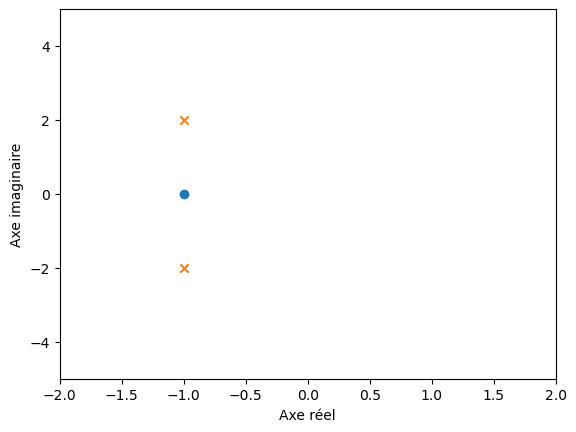

In [16]:
num = [1, 1]
den = [1, 2, 5]

z = np.roots(num)
p = np.roots(den)

plt.figure()
plt.scatter(np.real(z), np.imag(z), marker='o')
plt.scatter(np.real(p), np.imag(p), marker='x')
plt.axis([-2, 2, -5, 5])
plt.xlabel("Axe réel")
plt.ylabel("Axe imaginaire")

Pour déterminer le module de la réponse en fréquence $H(\omega)$, il faut se positionner sur l’axe imaginaire, à la « hauteur » $\omega$, et calculer les distances entre ce point et chacun des pôles et des zéros. Les figures ci-dessous montrent les distances correspondantes lorsque $\omega = 1$ (figure de gauche) et $\omega = 5$ (figure de droite), indiqué par le marqueur rouge.

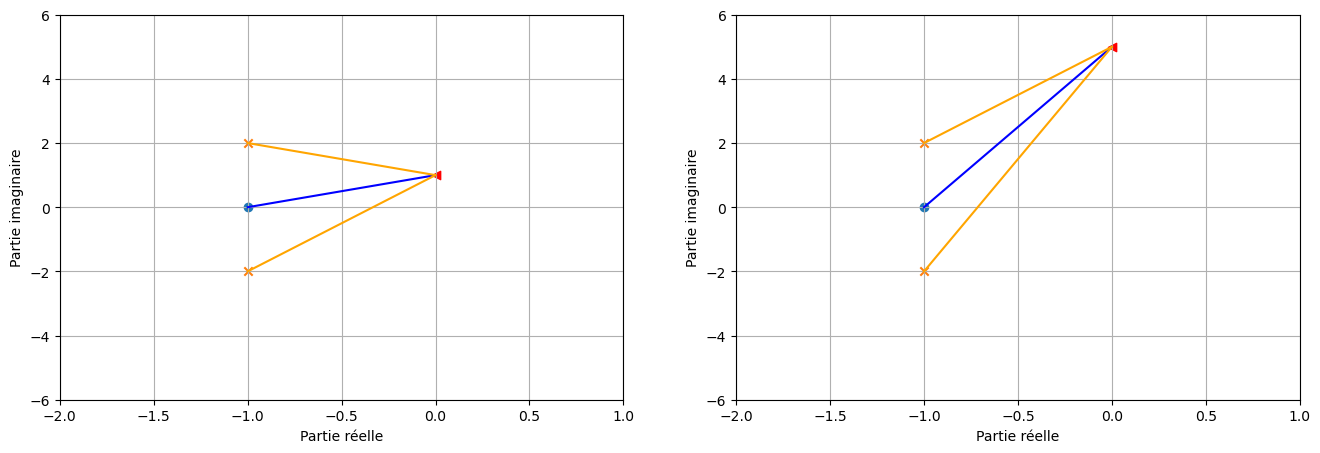

In [24]:
w1 = 1j
w2 = 5j

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(5)

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(np.real(z), np.imag(z), marker='o')
ax1.scatter(np.real(p), np.imag(p), marker='x')
ax1.scatter(np.real(w1), np.imag(w1), marker='<', color='r')
ax1.plot([np.real(z[0]), np.real(w1)], [np.imag(z[0]), np.imag(w1)], color='b')

ax1.plot([np.real(p[0]), np.real(w1)], [np.imag(p[0]), np.imag(w1)], color='orange')
ax1.plot([np.real(p[1]), np.real(w1)], [np.imag(p[1]), np.imag(w1)], color='orange')
ax1.axis([-2, 1, -6, 6])
ax1.set_xlabel("Partie réelle")
ax1.set_ylabel("Partie imaginaire")
ax1.grid()

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(np.real(z), np.imag(z), marker='o')
ax2.scatter(np.real(p), np.imag(p), marker='x')
ax2.scatter(np.real(w2), np.imag(w2), marker='<', color='r')
ax2.plot([np.real(z[0]), np.real(w2)], [np.imag(z[0]), np.imag(w2)], color='b')
ax2.plot([np.real(p[0]), np.real(w2)], [np.imag(p[0]), np.imag(w2)], color='orange')
ax2.plot([np.real(p[1]), np.real(w2)], [np.imag(p[1]), np.imag(w2)], color='orange')
ax2.axis([-2, 1, -6, 6])
ax2.set_xlabel("Partie réelle")
ax2.set_ylabel("Partie imaginaire")
ax2.grid()

En faisant le produit des distances entre le point $j\omega$ et chaque zéro (ici, un seul zéro de valeur finie), et en divisant par le produit des distances entre le point $j\omega$ et chaque pôle, on obtient le module de $H(j\omega)$ pour chaque valeur de $\omega$. Le module de $H(j\omega)$ est montré dans la figure ci-dessous pour $\omega$ entre 0 et 7. Chaque point (« cercle ») sur la courbe représente une valeur de $\omega$ où l’on a calculé le module de $H(j\omega)$ par la méthode géométrique. On retrouve entre autres le gain DC de 0.2.

Text(0, 0.5, 'Module de H(w)')

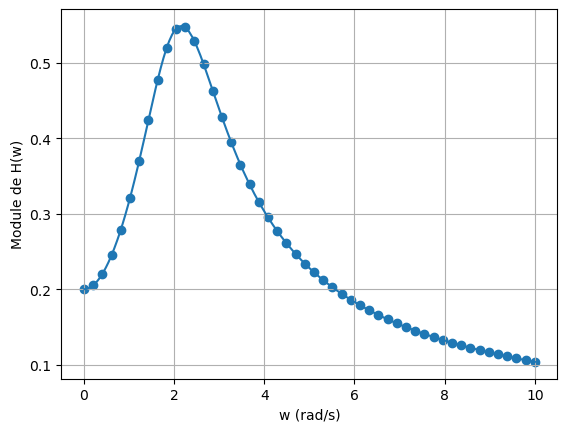

In [25]:
w, h = signal.freqs(num,den)
w_step = np.linspace(0, 10, 50)

h_step = np.abs(w_step*1j - z)/(np.abs(w_step*1j - p[0])*np.abs(w_step*1j - p[1]))

plt.figure()
plt.plot(w, np.abs(h))
plt.scatter(w_step, h_step)
plt.grid()
plt.xlabel("w (rad/s)")
plt.ylabel("Module de H(w)")

Pour être bien certain que l’on a saisi la méthode, essayons de calculer le module de $H(j\omega)$ pour $\omega = 2$ (i.e. à la hauteur des pôles). Selon la figure ci-dessus, nous devrions obtenir environ 0.55.

Pour $\omega = 2$, le point $j\omega$  est tel que montré à la figure suivante, et les distances à calculer sont les longueurs des trois segments montrés :


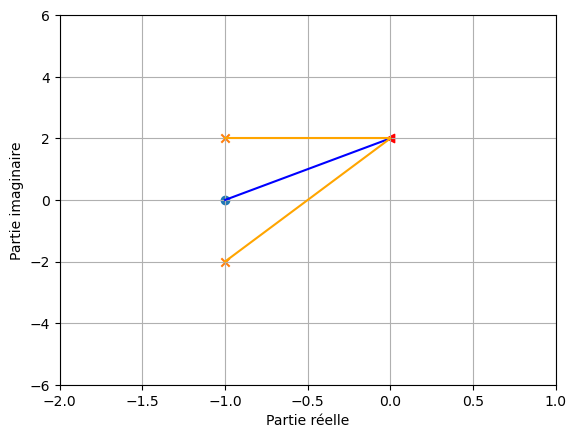

In [27]:
w3 = 2j

fig = plt.figure()

ax1 = plt.subplot(1, 1, 1)
ax1.scatter(np.real(z), np.imag(z), marker='o')
ax1.scatter(np.real(p), np.imag(p), marker='x')
ax1.scatter(np.real(w3), np.imag(w3), marker='<', color='r')
ax1.plot([np.real(z[0]), np.real(w3)], [np.imag(z[0]), np.imag(w3)], color='b')
ax1.plot([np.real(p[0]), np.real(w3)], [np.imag(p[0]), np.imag(w3)], color='orange')
ax1.plot([np.real(p[1]), np.real(w3)], [np.imag(p[1]), np.imag(w3)], color='orange')
ax1.axis([-2, 1, -6, 6])
ax1.set_xlabel("Partie réelle")
ax1.set_ylabel("Partie imaginaire")
ax1.grid()

Par trigonométrie simple, on trouve que la distance entre le point $j\omega$  et le zéro de $H(s)$ est

$$
\sqrt{1+2^2} = \sqrt{5}
$$

De même, les distances entre le point $j\omega$  et les deux pôles sont, respectivement

$$
1
$$

(pour le pôle supérieur)

et

$$
\sqrt{1+4^2} = \sqrt{17}
$$

(pour le pôle inférieur).

Ainsi, le module de $H(\omega)$ pour $\omega = 2$ doit être

$$
|H(\omega)|_{\omega=2} = \frac{\sqrt{5}}{(1)\sqrt{17}} \approx 0.54
$$

ce qui donne la valeur attendue.

On peut répéter cette méthode pour toutes les valeurs de la fréquence $\omega$.

## Exercice

Appliquez la méthode géométrique pour déterminer, à partir de son diagramme pôles-zéros,  le module de la réponse en fréquences du [système 2](#Systeme2).


## Stabilité

Le lieu des pôles et des zéros permet de déterminer la stabilité d’un filtre, ou plus généralement d’un système LTI. Un système est stable si sa réponse impulsionnelle tend vers 0 lorsque $t$ tend vers l’infini. Dans ce cas, la réponse impulsionnelle est un signal à énergie finie, i.e.

$$
\int^\infty_{t=0} h(t)^2 dt < \infty
$$

Prenons le cas simple d’un système LTI d’ordre 1, dont la fonction de transfert est

$$
H(s) = \frac{K}{s+a}
$$

où $a$ est une constante réelle. Dans le domaine de Laplace, la réponse de ce système est

$$
Y(s) = H(s) X(s)
$$

Si l’entrée $x(t)$ est une impulsion de Dirac, sa transformée de Laplace est 1 (voir les tables) et donc la transformée de la réponse impulsionnelle est (c’est toujours le cas)

$$
Y(s) = H(s)
$$

Ainsi, pour ce système d’ordre 1, la réponse impulsionnelle est

$$
y(t) = h(t) = \mathrm{e}^{-at}u(t)
$$

Cette réponse tendra vers zéro lorsque $t$ tendra vers l’infini uniquement si

$$
a \ > \ 0
$$

Or, il se trouve que $a$ est aussi le pôle de la fonction de transfert $H(s)$. Les paires de figures suivantes montrent la relation entre le pôle (réel) a de la fonction de transfert et la forme de $h(t)$. On en conclut que pour être stable, le pôle d’un système d’ordre 1 doit être à gauche de l’axe imaginaire dans le plan complexe.

Text(0.5, 0, 't(s)')

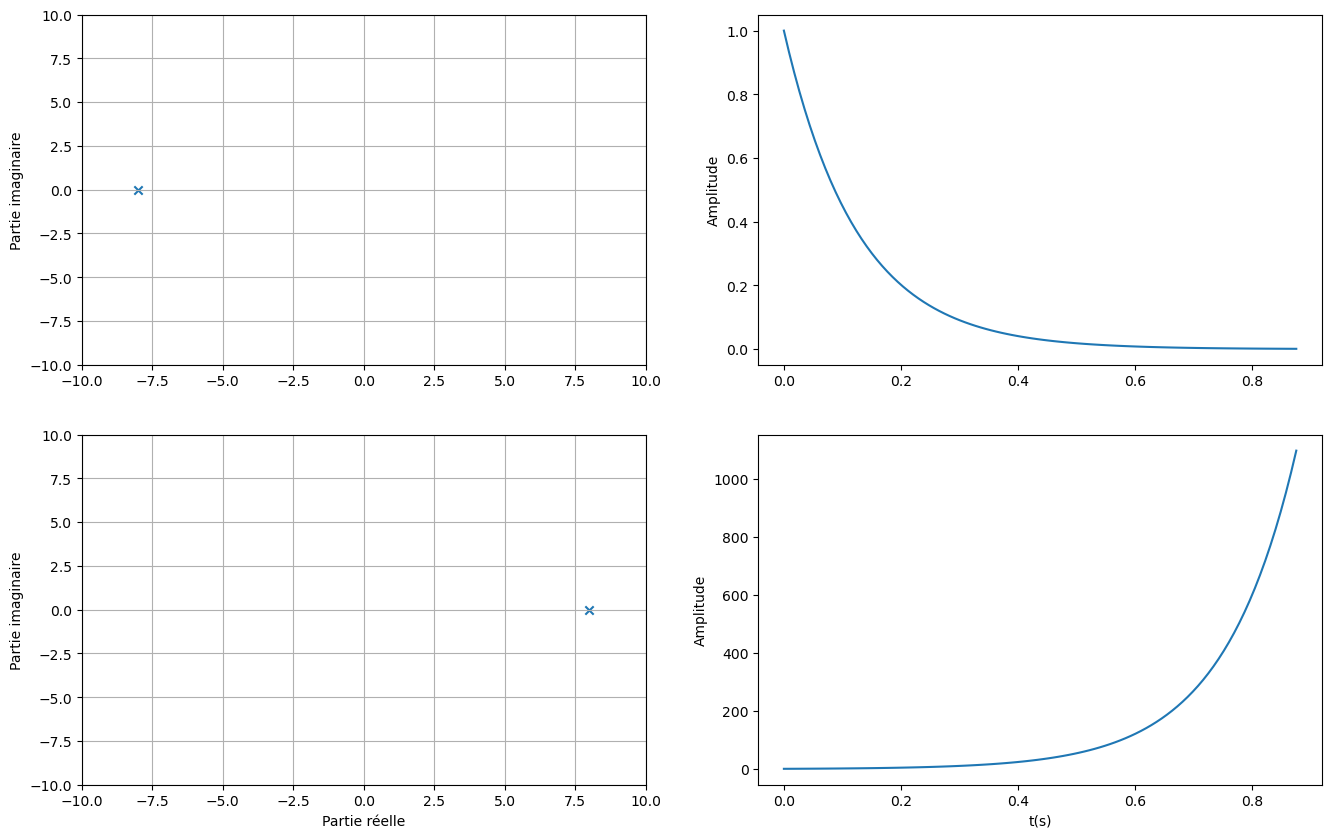

In [28]:
K = 1
a1 = 8
a2 = -8

t1,y1 = signal.impulse(([K], [1, a1]))
t2,y2 = signal.impulse(([K], [1, a2]))

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = plt.subplot(2, 2, 1)
ax1.scatter(np.real(-a1), np.imag(-a1), marker='x')
ax1.axis([-10, 10, -10, 10])
ax1.set_ylabel("Partie imaginaire")
ax1.grid()

ax2 = plt.subplot(2,2,2)
ax2.plot(t1,y1)
ax2.set_ylabel("Amplitude")

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(np.real(-a2), np.imag(-a2), marker='x')
ax3.axis([-10, 10, -10, 10])
ax3.set_xlabel("Partie réelle")
ax3.set_ylabel("Partie imaginaire")
ax3.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(t2,y2)
ax4.set_ylabel("Amplitude")
ax4.set_xlabel("t(s)")

On peut faire la même analyse pour un système d’ordre 2. Soit la fonction de transfert suivante :

$$
H(s) = \frac{K}{s^2+as+b}
$$

Les pôles de $H(s)$ (racines du dénominateur) sont soit tous les deux réels, soit tous les deux complexes conjugués (pour assurer que les coefficients $a$ et $b$ soient réels). Soient $p1$ et $p2$ ces deux pôles. On peut écrire :

$$
p1 = \frac{-a}{2} + \frac{\sqrt{a^2 - 4b}}{2}
$$

et 

$$
p2 = \frac{-a}{2} - \frac{\sqrt{a^2 - 4b}}{2}
$$

On peut maintenant écrire

$$
H(s) = \frac{K}{(s-p1)(s-p2)}
$$

et en développant en fractions partielles :

$$
H(s) = \frac{K/(p1-p2)}{(s-p1)} + \frac{K/(p2-p1)}{(s-p2)}
$$

On suppose que $p1 \neq p2$

La réponse impulsionnelle de ce système est

$$
h(t)=\frac{k}{(p 1-p 2)} \mathrm{e}^{p 1 t} u(t)+\frac{k}{(p 2-p 1)} \mathrm{e}^{p 2 t} u(t)
$$

Pour que le système soit stable, il faut à la fois que la partie réelle de $p1$ et la partie réelle de $p2$ soient négatives. Sinon, les exponentielles $\mathrm{e}^{p 1 t}$ et $\mathrm{e}^{p 2 t}$ deviendront infinie lorsque $t\rightarrow \infty$.

On a donc la situation suivante :

Text(0.5, 0, 't(s)')

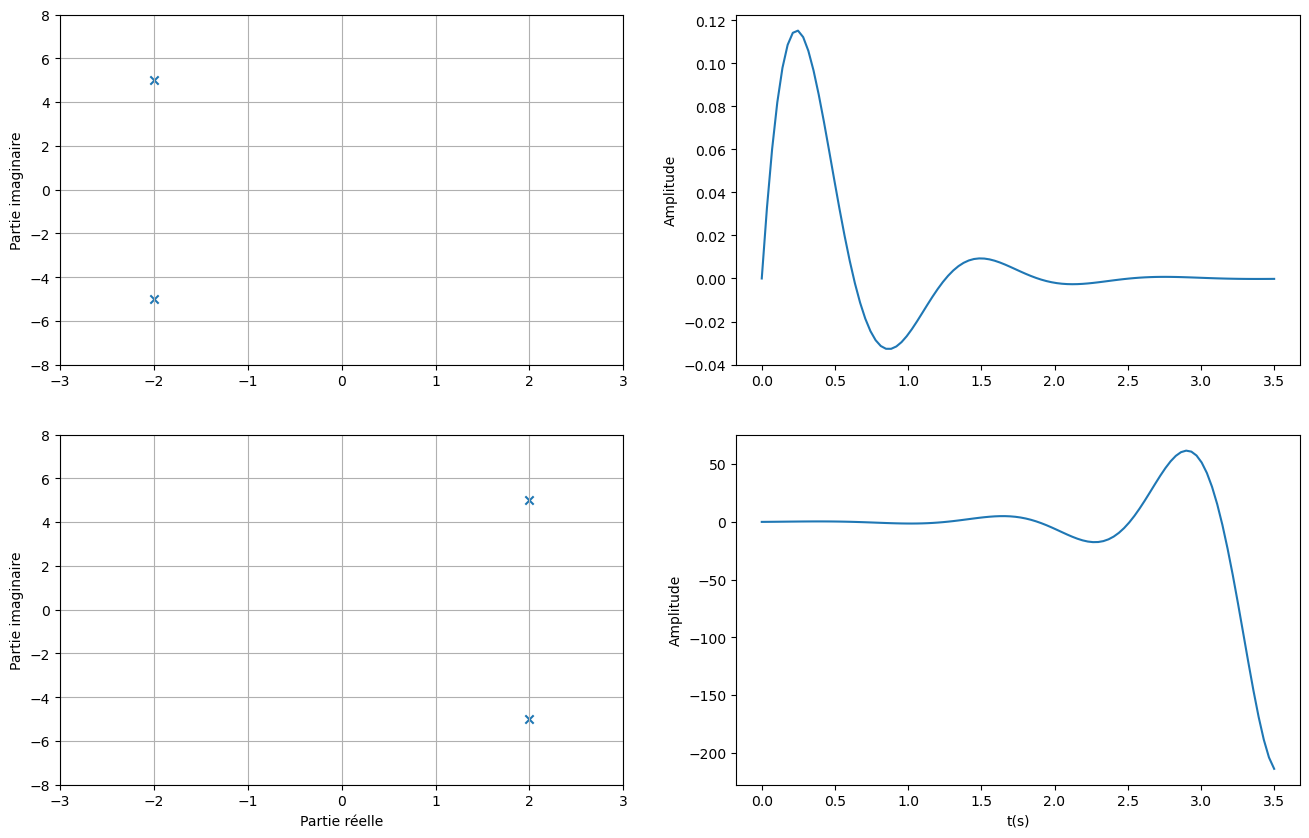

In [29]:
K = 1
p1 = [-2 + 5j, -2 - 5j]
p2 = [2 + 5j, 2 - 5j]

t1,y1 = signal.impulse(([], p1, [K]))
t2,y2 = signal.impulse(([], p2, [K]))

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = plt.subplot(2, 2, 1)
ax1.scatter(np.real(p1), np.imag(p1), marker='x')
ax1.axis([-3, 3, -8, 8])
ax1.set_ylabel("Partie imaginaire")
ax1.grid()

ax2 = plt.subplot(2,2,2)
ax2.plot(t1,y1)
ax2.set_ylabel("Amplitude")

ax3 = plt.subplot(2, 2, 3)
ax3.scatter(np.real(p2), np.imag(p2), marker='x')
ax3.axis([-3, 3, -8, 8])
ax3.set_xlabel("Partie réelle")
ax3.set_ylabel("Partie imaginaire")
ax3.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(t2,y2)
ax4.set_ylabel("Amplitude")
ax4.set_xlabel("t(s)")

Puisque l’on peut faire l’expansion en fractions partielles de toute fonction de transfert $H(s)$, on en conclue que 

>Pour être stable, un système LTI doit posséder des pôles qui se trouvent tous à gauche de l’axe imaginaire dans le plan complexe, i.e. que la partie réelle des pôle doit toujours être négative.

Les fonctions Python du module Scipy de conception de filtres, comme __[butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)__, __[cheby1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html)__, __[cheby2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html)__ et __[bessel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bessel.html)__ retournent la fonction de transfert de filtres stables. Par exemple, le code suivant permet de générer les coefficients de la fonction de transfert d’un filtre Butterworth passe-bas d’ordre 4, de fréquence de coupure 100 rad/sec. Le vecteur `B` contient les coefficients du numérateur de $H(s)$, en ordre décroissant des puissances de $s$, et le vecteur `A` contient les coefficients du dénominateur de $H(s)$.

```
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

B, A = signal.butter(4, 100, analog=True)
```

Ce filtre n’a pas de zéros explicites, c.a.d. de valeurs finies (le numérateur `B` est une constante), mais il a 4 pôles, que l’on obtient de la façon suivante avec la fonction roots qui calcule les racines d’un polynôme :

```
poles = np.roots(A)
```

On peut maintenant afficher les pôles de ce filtre :

```
plt.scatter(np.real(poles), np.imag(poles). marker='x')
plt.axis([-100, 100, -100, 100])
```

On observe que les pôles sont dans le plan gauche, donc le filtre est stable. On y observe que les pôles d’un filtre de Butterworth passe-bas sont situés sur un demi-cercle dans le plan gauche du plan complexe.

Text(0, 0.5, 'Partie imaginaire')

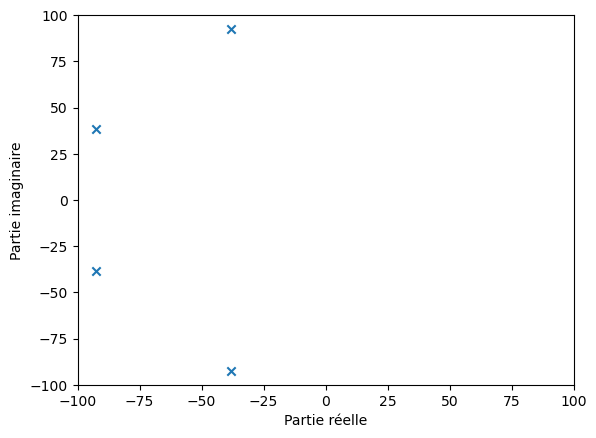

In [30]:
B, A = signal.butter(4, 100, analog=True)
poles = np.roots(A)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x')
plt.axis([-100, 100, -100, 100])
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")

## Carte des pôles et des zéros versus forme de la réponse

Avec la position des pôles et des zéros dans le plan complexe, on peut déterminer rapidement la forme que devrait prendre la réponse d’un filtre, tant dans le domaine temporel (réponse impulsionnelle) que fréquentiel (réponse en fréquence). En effet, plus certains pôles s’approchent de l’axe imaginaire (sans toutefois passer dans le demi-plan droit), plus le filtre est résonnant à cette fréquence. Ceci se traduit par un pic étroit dans le domaine fréquentiel, et par une réponse impulsionnelle longue dans le domaine temporel.

Voici quelques exemples. On montre dans chaque cas le lieu des pôles et des zéros, le module de la réponse en fréquence, et la réponse impulsionnelle.

Text(0, 0.5, 'Amplitude')

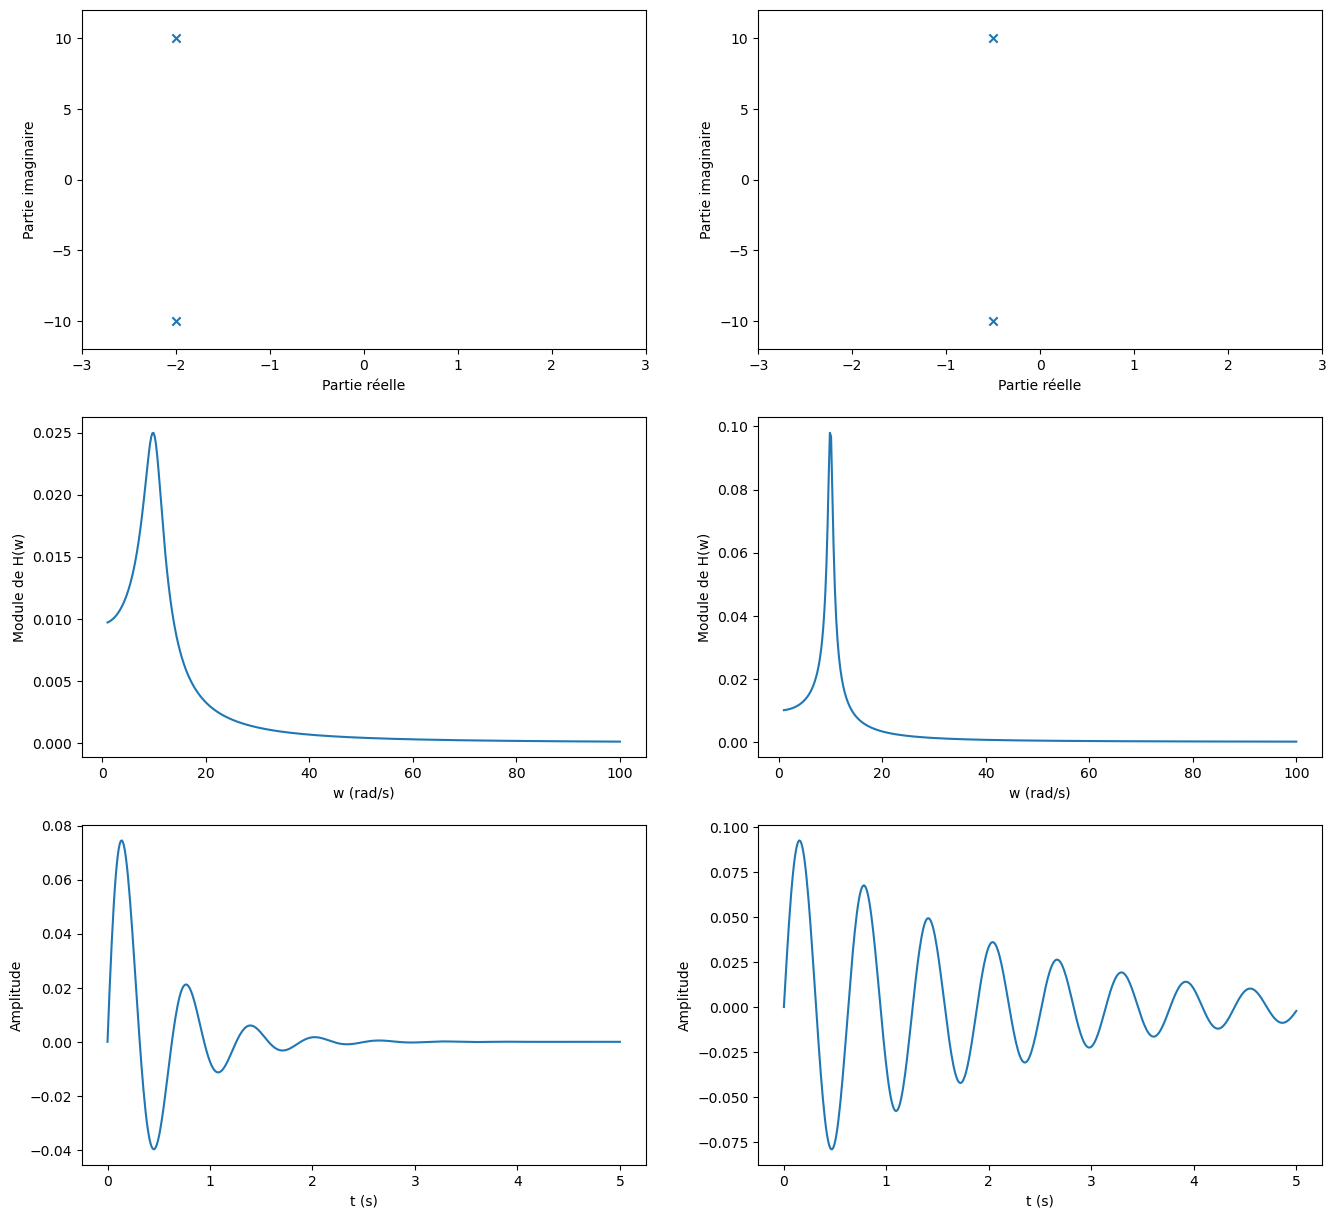

In [31]:
p1 = [-2 + 10j, -2 - 10j]
p2 = [-0.5 + 10j, -0.5 - 10j]

H1 = ([], p1, [1])
H2 = ([], p2, [1])

w1,h1 = signal.freqs_zpk([], p1, [1])
w2,h2 = signal.freqs_zpk([], p2, [1])

time = np.linspace(0, 5, 500)
t1, y1 = signal.impulse(H1, T=time)
t2, y2 = signal.impulse(H2, T=time)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(15)

ax1 = plt.subplot(3,2,1)
ax1.scatter(np.real(p1), np.imag(p1), marker='x')
ax1.axis([-3, 3, -12, 12])
ax1.set_xlabel("Partie réelle")
ax1.set_ylabel("Partie imaginaire")

ax2 = plt.subplot(3,2,2)
ax2.scatter(np.real(p2), np.imag(p2), marker='x')
ax2.axis([-3, 3, -12, 12])
ax2.set_xlabel("Partie réelle")
ax2.set_ylabel("Partie imaginaire")

ax3 = plt.subplot(3,2,3)
ax3.plot(w1,np.abs(h1))
ax3.set_xlabel("w (rad/s)")
ax3.set_ylabel("Module de H(w)")

ax4 = plt.subplot(3,2,4)
ax4.plot(w2,np.abs(h2))
ax4.set_xlabel("w (rad/s)")
ax4.set_ylabel("Module de H(w)")

ax5 = plt.subplot(3,2,5)
ax5.plot(t1,y1)
ax5.set_xlabel("t (s)")
ax5.set_ylabel("Amplitude")

ax6 = plt.subplot(3,2,6)
ax6.plot(t2,y2)
ax6.set_xlabel("t (s)")
ax6.set_ylabel("Amplitude")

La différence dans les deux exemples précédents est la distance entre les pôles et l’axe imaginaire. Dans le premier cas, les pôles sont

			p1	=	-2 + 10 j
			p2	=	-2 - 10 j

alors que dans le deuxième cas, les pôles sont

			p1	=	-0.5 + 10 j
			p2	=	-0.5 - 10 j

On observe que plus les pôles sont près de l’axe imaginaire (tout en restant à gauche), plus le filtre est résonnant (pic étroit dans la réponse en fréquence) et plus la réponse impulsionnelle est longue. Un filtre résonnant veut donc dire un filtre qui « résonne » (oscille) longtemps à une fréquence donnée, i.e. à la fréquence qui correspond à la « hauteur » des pôles dans le plan complexe.


Observons maintenant l’effet produit par un déplacement vertical des pôles (ce qui devrait produire, on s’en attend, une variation de la fréquence de résonance).



Text(0, 0.5, 'Amplitude')

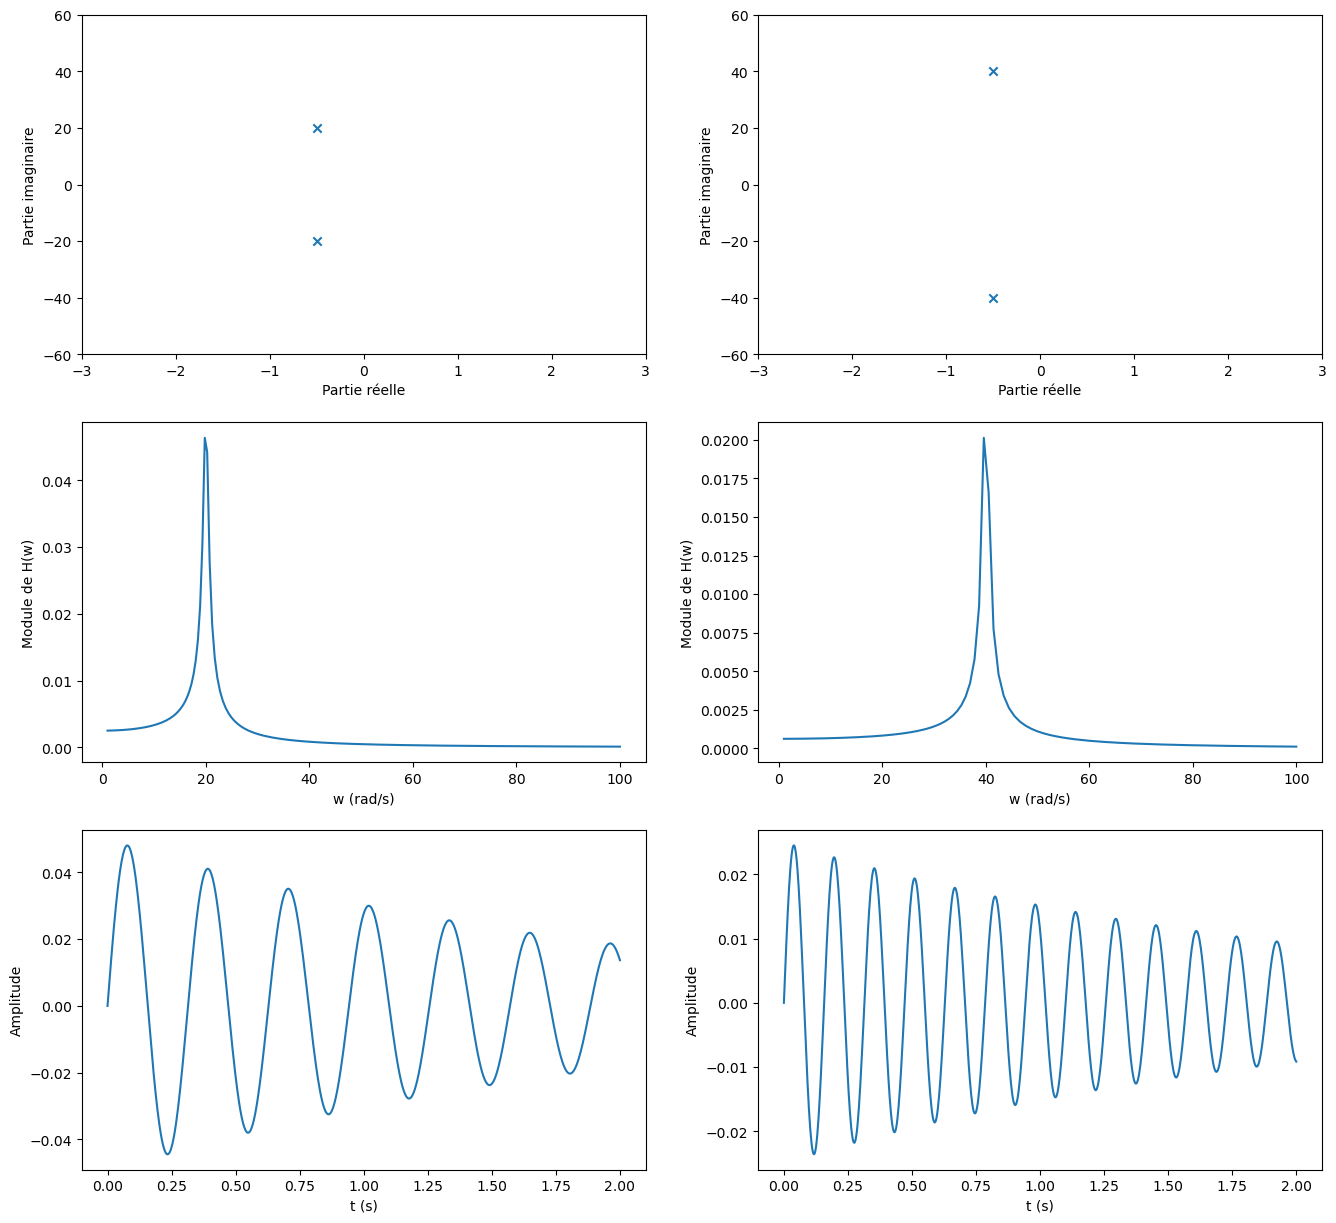

In [32]:
p1 = [-0.5 + 20j, -0.5 - 20j]
p2 = [-0.5 + 40j, -0.5 - 40j]

H1 = ([], p1, [1])
H2 = ([], p2, [1])

w1,h1 = signal.freqs_zpk([], p1, [1])
w2,h2 = signal.freqs_zpk([], p2, [1])

time = np.linspace(0, 2, 800)
t1, y1 = signal.impulse(H1, T=time)
t2, y2 = signal.impulse(H2, T=time)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(15)

ax1 = plt.subplot(3,2,1)
ax1.scatter(np.real(p1), np.imag(p1), marker='x')
ax1.axis([-3, 3, -60, 60])
ax1.set_xlabel("Partie réelle")
ax1.set_ylabel("Partie imaginaire")

ax2 = plt.subplot(3,2,2)
ax2.scatter(np.real(p2), np.imag(p2), marker='x')
ax2.axis([-3, 3, -60, 60])
ax2.set_xlabel("Partie réelle")
ax2.set_ylabel("Partie imaginaire")

ax3 = plt.subplot(3,2,3)
ax3.plot(w1,np.abs(h1))
ax3.set_xlabel("w (rad/s)")
ax3.set_ylabel("Module de H(w)")

ax4 = plt.subplot(3,2,4)
ax4.plot(w2,np.abs(h2))
ax4.set_xlabel("w (rad/s)")
ax4.set_ylabel("Module de H(w)")

ax5 = plt.subplot(3,2,5)
ax5.plot(t1,y1)
ax5.set_xlabel("t (s)")
ax5.set_ylabel("Amplitude")

ax6 = plt.subplot(3,2,6)
ax6.plot(t2,y2)
ax6.set_xlabel("t (s)")
ax6.set_ylabel("Amplitude")

On observe en effet que la position verticale des pôles a un effet direct sur la fréquence de résonance du système. Plus les pôles sont éloignés de l’axe horizontal (i.e. plus $\omega$ est grand), plus la fréquence de résonance est élevée. On remarque aussi que si la distance entre les pôles et l’axe imaginaire ne change pas, la largeur du pic dans le domaine des fréquences (directement liée au facteur de qualité $Q$) et l’enveloppe de la réponse impulsionnelle ne changent pas.

## Propriétés

Puisqu’il existe un lien très serré entre la transformée de Laplace et la transformée de Fourier (Fourier est un cas particulier de Laplace), les propriétés de ces deux transformées sont très similaires. Un document résumant ces propriété est fourni sur e site web de l'unité.

Pour résumer quelques unes de ces propriétés :

- ces transformées (Laplace et Fourier) sont linéaires;
- la transformée d’une dérivée est égale à la transformée du signal avant dérivation, multipliée par l’élément fréquentiel $s$ (pour Laplace) ou $j\omega$ (pour Fourier);
- la transformée d’une intégrale est égale à la transformée du signal avant intégration, divisée par l’élément fréquentiel $s$ (pour Laplace) ou $j\omega$ (pour Fourier);
- Un décalage temporel de $\tau$ introduit le facteur $\mathrm{e}^{-s\tau}$ (pour Laplace) et  $\mathrm{e}^{-j\omega\tau}$ (pour Fourier);
- Multiplier par une sinusoïde a l’effet de décaler le spectre d’origine, et de le centrer à la fréquence de la sinusoïde (la porteuse), à la fois dans les fréquences positives et négatives.

## Exercices de synthèse

### Exercice 1

La fonction de transfert $H(s)$ d’un filtre analogique est donnée  par 

$$
H(s) = \frac{s(s+1)}{s^2+2s+10}
$$

(a) Affichez ses pôles et ses zéros dans le plan complexe

(b) Avec la méthode graphique, tracez à l’échelle une bonne approximation de sa réponse en fréquence

(c) Si on remplace le facteur 10 au dénominateur par le facteur –10, la fonction de transfert est-elle toujours stable ?  Justifiez.


### Exercice 2

On demande ici de comparer deux filtres de Butterworth passe-bande d’ordre 1 (i.e. que le dénominateur de la fonction de transfert sera un ordre 2…)

Le premier filtre doit être un Butterworth passe-bande d’ordre 1, centré à 1000 Hz, de largeur 40 Hz.

Le second filtre doit être un Butterworth passe-bande d’ordre 1, centré à 1000 Hz, de largeur 200 Hz.

Le code Python suivant permet de générer ces deux filtres.

```
import numpy as np
import scipy.signal as signal

B1, A1 = signal.butter(1, 2*np.pi*[980, 1020], btype='bandpass', analog=True)
B2, A2 = signal.butter(1, 2*np.pi*[900, 1100], btype='bandpass', analog=True)

```

(a) Avec la fonction `roots`, calculez les pôles et les zéros de ces filtres, et affichez-les dans le plan complexe

(b) Avec la fonction `bode` ou `freqs` affichez le module de la réponse en fréquences de ces deux filtres

(c) Avec `impulse`, obtenez la réponse impulsionnelle de ces filtres

(d) Discutez ce que vous observez, et faites le lien avec le facteur de qualité $Q$ de ces deux filtres (que vous pouvez calculez avec les valeurs des coefficients de `A`, le dénominateur de $H(s)$).
